<a href="https://colab.research.google.com/github/saeyesss/exposys_internship/blob/main/EXPOSYS_INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPOSYS DATA LABS INTERNSHIP**
### ***PROJECT DESCRIPTION***
*In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies are given along with the profit earned. The target is to prepare an ML model which can predict the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing Spend are given.*

---
###***Objectives***:
 1. *Construct Different Regression algorithms*

 2. *Divide the data into train set and test set*
 
 3. *Calculate different regression metrics*
 
 4. *Choose the best model*

####*Data Preprocessing*

In [62]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# pyplot style
plt.style.use('Solarize_Light2')


# importing the dataset
dataset = pd.read_csv('/content/50_Startups.csv')
# print the first five values
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [63]:
dataset.isnull().sum() # checking for null values
dataset.shape # checking the shape, no of rows and columns in the CSV

(50, 4)

In [64]:
dataset.info() # getting the metadata about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


####*Visualize the dataset using Seaborn Pairplot*

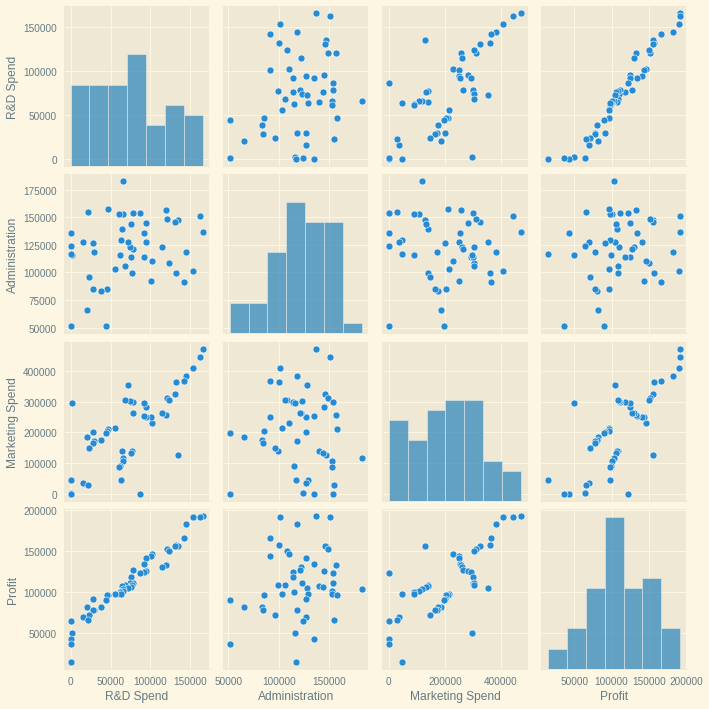

In [65]:
sns.pairplot(dataset) # visualization

####*Splitting Dataset for training and testing regressor models*

In [66]:
X = dataset[["R&D Spend", "Administration", "Marketing Spend"]] # features 
y = dataset["Profit"] # target

In [67]:
# feature scaling (normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [68]:
# splitting dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

####*Regressor Model Training*

In [69]:
# imports
from sklearn import model_selection
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from mlxtend.regressor import StackingRegressor
import xgboost as xgb


In [70]:
# initialize the models
RF = RandomForestRegressor(n_estimators = 150)
KNR = KNeighborsRegressor()
DTR = DecisionTreeRegressor()
ABR = AdaBoostRegressor(n_estimators = 150)
BR = BaggingRegressor(n_estimators = 150)
GBR = GradientBoostingRegressor(n_estimators = 150)
xgboost = xgb.XGBRegressor()

####*Model Training and R^2 scores*


In [71]:
RF.fit(X_train, y_train)
RF.score(X_test, y_test)

0.9597528862519928

In [72]:
KNR.fit(X_train, y_train)
KNR.score(X_test, y_test)

0.7999339625806251

In [73]:
DTR.fit(X_train, y_train)
DTR.score(X_test, y_test)

0.9760218847941272

In [74]:
ABR.fit(X_train, y_train)
ABR.score(X_test, y_test)

0.9510567864319934

In [75]:
BR.fit(X_train, y_train)
BR.score(X_test, y_test)

0.9604664791512972

In [76]:
GBR.fit(X_train, y_train)
GBR.score(X_test, y_test)

0.9220374621266902

In [77]:
xgboost.fit(X_train, y_train)
xgboost.score(X_test, y_test)

[05:58:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8871292826163539

*Here we see that the RandomForest, DecisionTree models provide the highest R^2 scores for the prediction.*

*However, Random forests consist of multiple single trees each based on a random sample of the training data. They are typically more accurate than single decision trees.*

*Single DTs require pruning to avoid overfitting.*

*Randomness and voting mechanisms in random forests  solve the overfitting problem.*

*Hence here I choose the RandomForestsRegression Model over the DecisionTree Model.*


*Source: [Towards Data Science Article](https://towardsdatascience.com/why-random-forests-outperform-decision-trees-1b0f175a0b5)*

#### *Error Calculation*

In [78]:
from sklearn.metrics import r2_score, mean_absolute_error

pred = RF.predict(X_test)


print( f'R2 Score: {r2_score(y_test, pred)}') # error score
print( f'Mean Absolute Error: {mean_absolute_error(y_test, pred)}') # mean absolute error


R2 Score: 0.9597528862519928
Mean Absolute Error: 5625.59945333339


#### *Save the Trained Model*

In [79]:
# saving the RandomForest Model using Pickle
import pickle 

with open('profit_model.pkl', 'wb') as model:
  pickle.dump(RF, model)

#### *Visualizing the result*

R2 Score: 0.9597528862519928



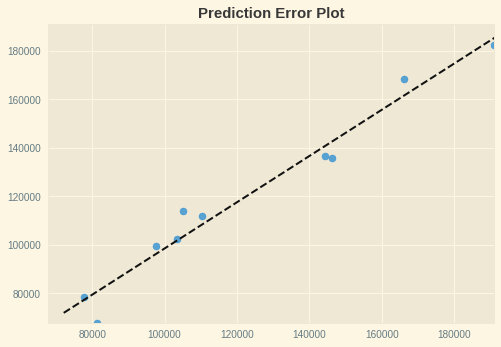

In [80]:
from yellowbrick.regressor import PredictionError


visualizer = PredictionError(RF)
visualizer.fit(X_train, y_train)                        # fit the training data to the visualizer

print( f'R2 Score: {visualizer.score(X_test, y_test)}') # evaluate the model on the test data
print() 

plt.title("Prediction Error Plot",fontsize=15, color= '#383838', fontweight='bold')

plt.show()                                              # draw the plot